In [1]:
import os
os.chdir(os.pardir)

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import matplotlib.patches as mpatches
import pandas as pd

import vapor
from vapor.models import Cambium

2020-10-22 17:09:11,292 [MainThread  ] [INFO ]  Starting log for vapor...


In [2]:
dfs = []

# --- Define Optimization Variables ---
aggregate_region = 'state'
opt_vars = ['marginal_cost_mwh']
scenarios = ['StdScen19_High_RE_Cost', 'StdScen19_Low_RE_Cost', 'StdScen19_Mid_Case']
techs = ['pv', 'wind']
batt_sizes = [0., 25., 100.]
batt_durations = [4.]

for opt_var in opt_vars:
    for scenario in scenarios:
        for tech in techs:
            for batt_size in batt_sizes:
                for batt_duration in batt_durations:
                    file = f"{aggregate_region}_best_{tech}_{scenario}_{opt_var}_batt_{batt_size}_{batt_duration}.pkl"
                    fp = os.path.join('results',file)
                    dfs.append(pd.read_pickle(fp))


results = pd.concat(dfs, axis='rows')


In [3]:
Viz = vapor.Visualizer(results=results, aggregate_region=aggregate_region, region_label_pct=0.6)

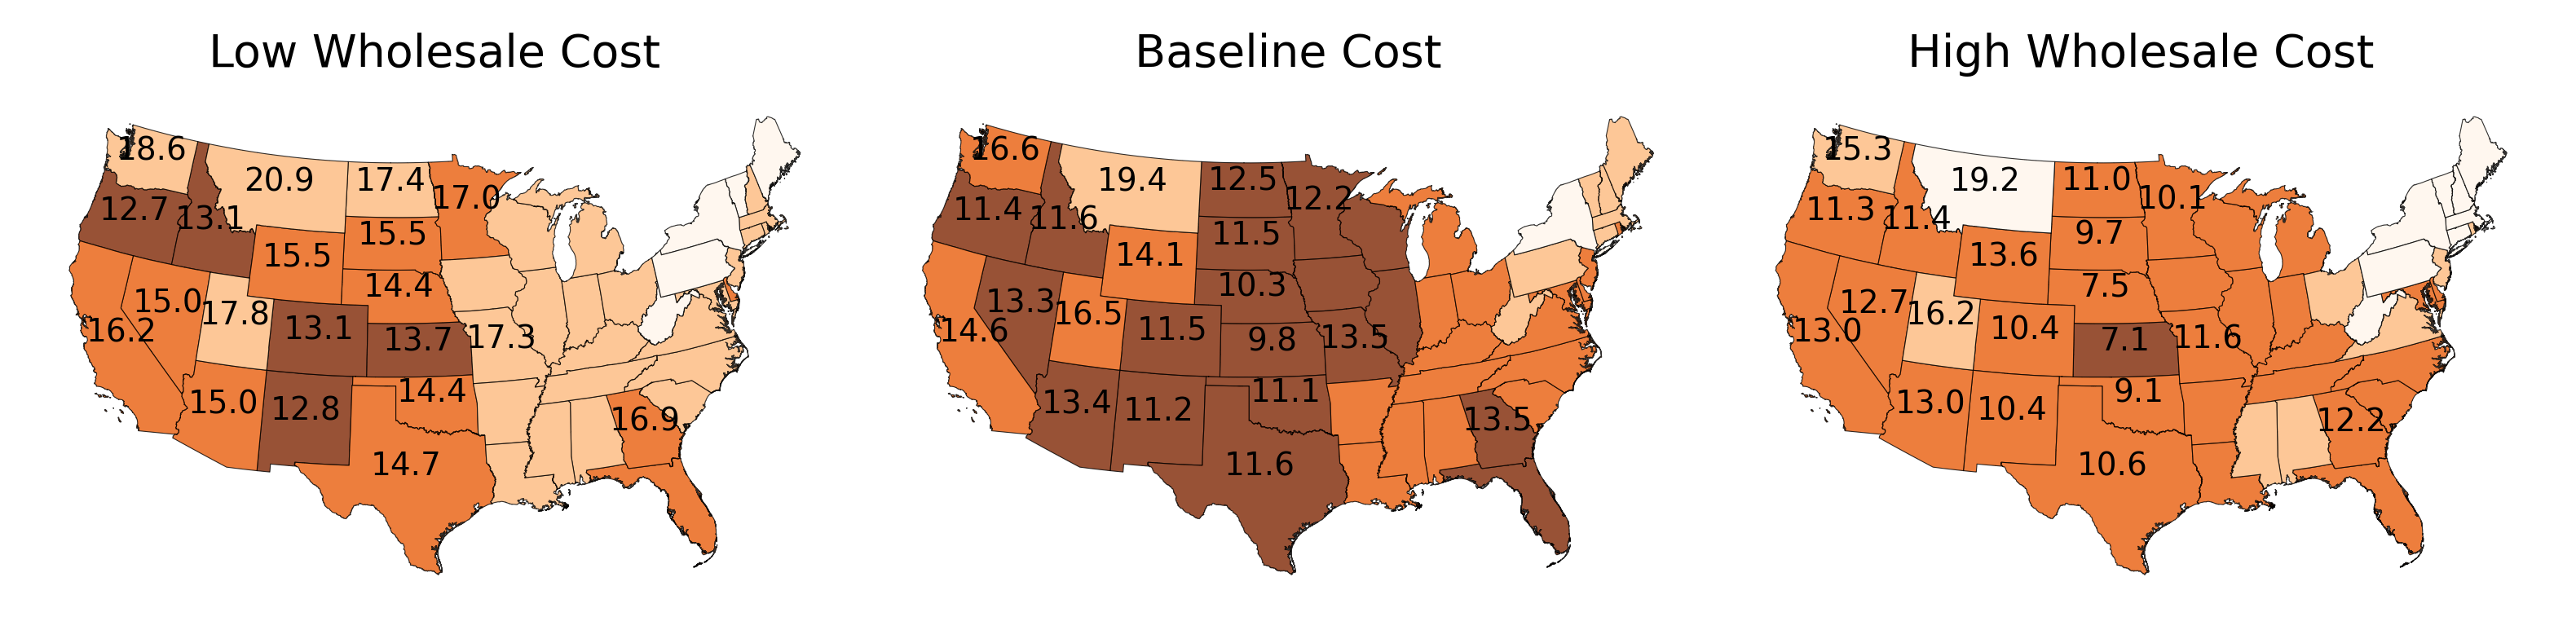

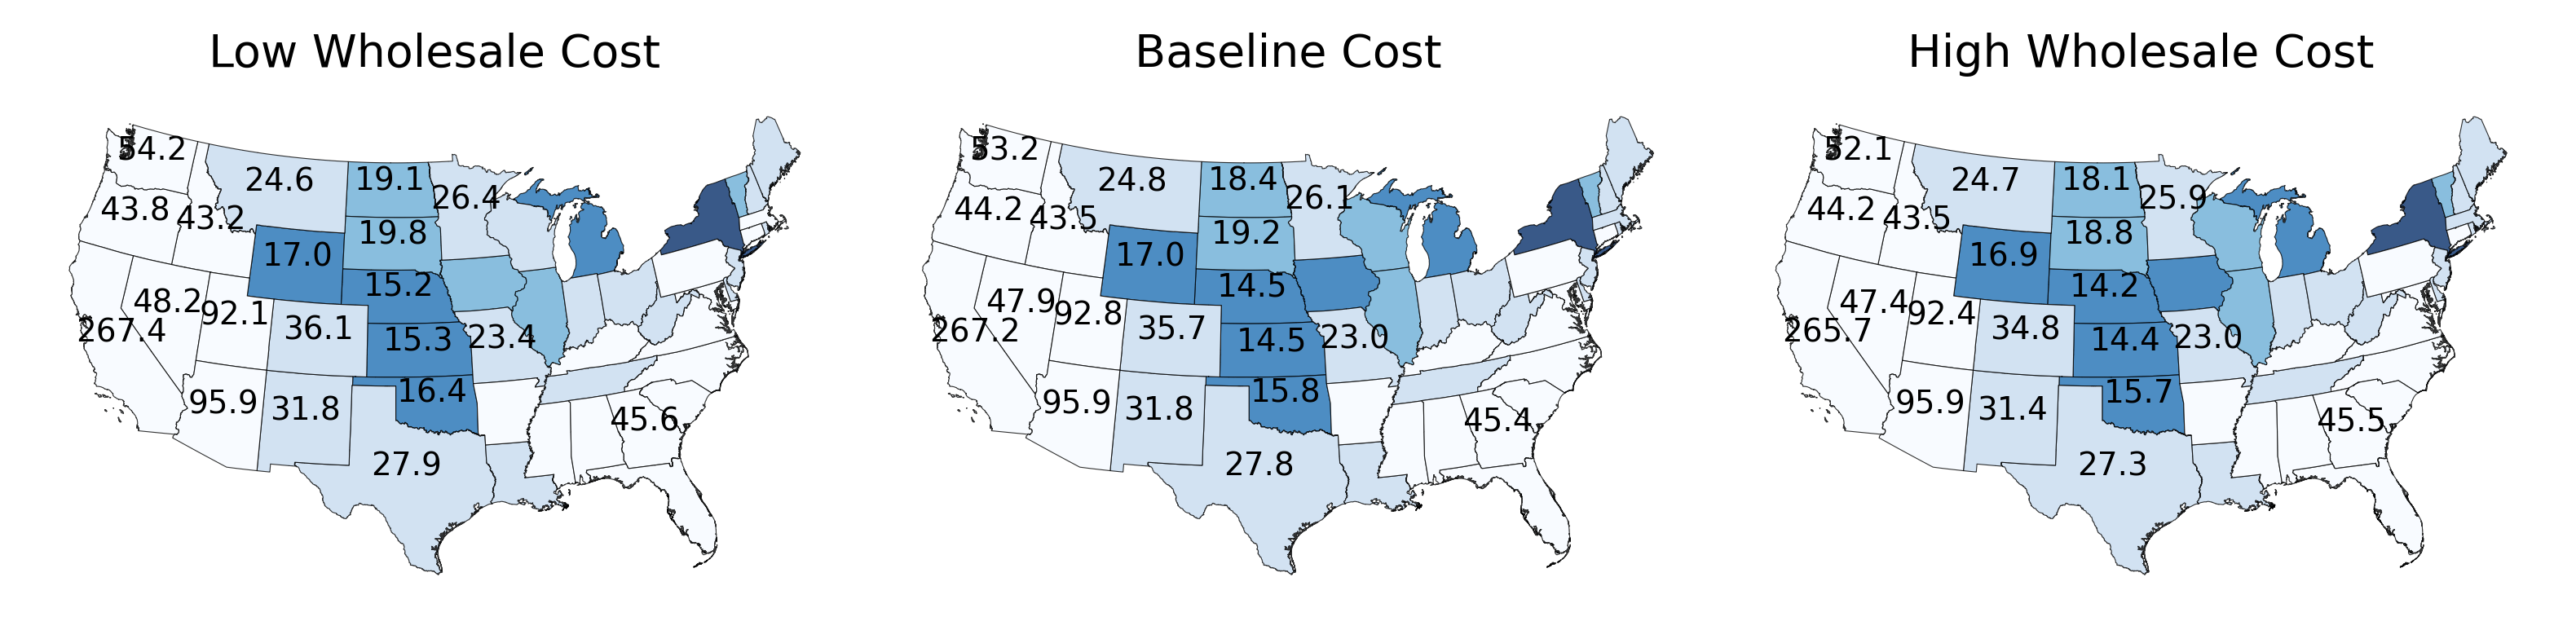

In [4]:
# --- Choropleths ---
Viz.triple_choropleth(column='marginal_cost_mwh',
               tech='pv',
               ascending=True, reverse_cmap=True)

Viz.triple_choropleth(column='marginal_cost_mwh',
               tech='wind',
               ascending=True, reverse_cmap=True)

# Viz.choropleth(column='lifetime_cambium_total_value', scenario='StdScen19_Low_RE_Cost', ascending=False)
# Viz.choropleth(column='lifetime_co2_rate_marginal', scenario='StdScen19_Low_RE_Cost', ascending=False)


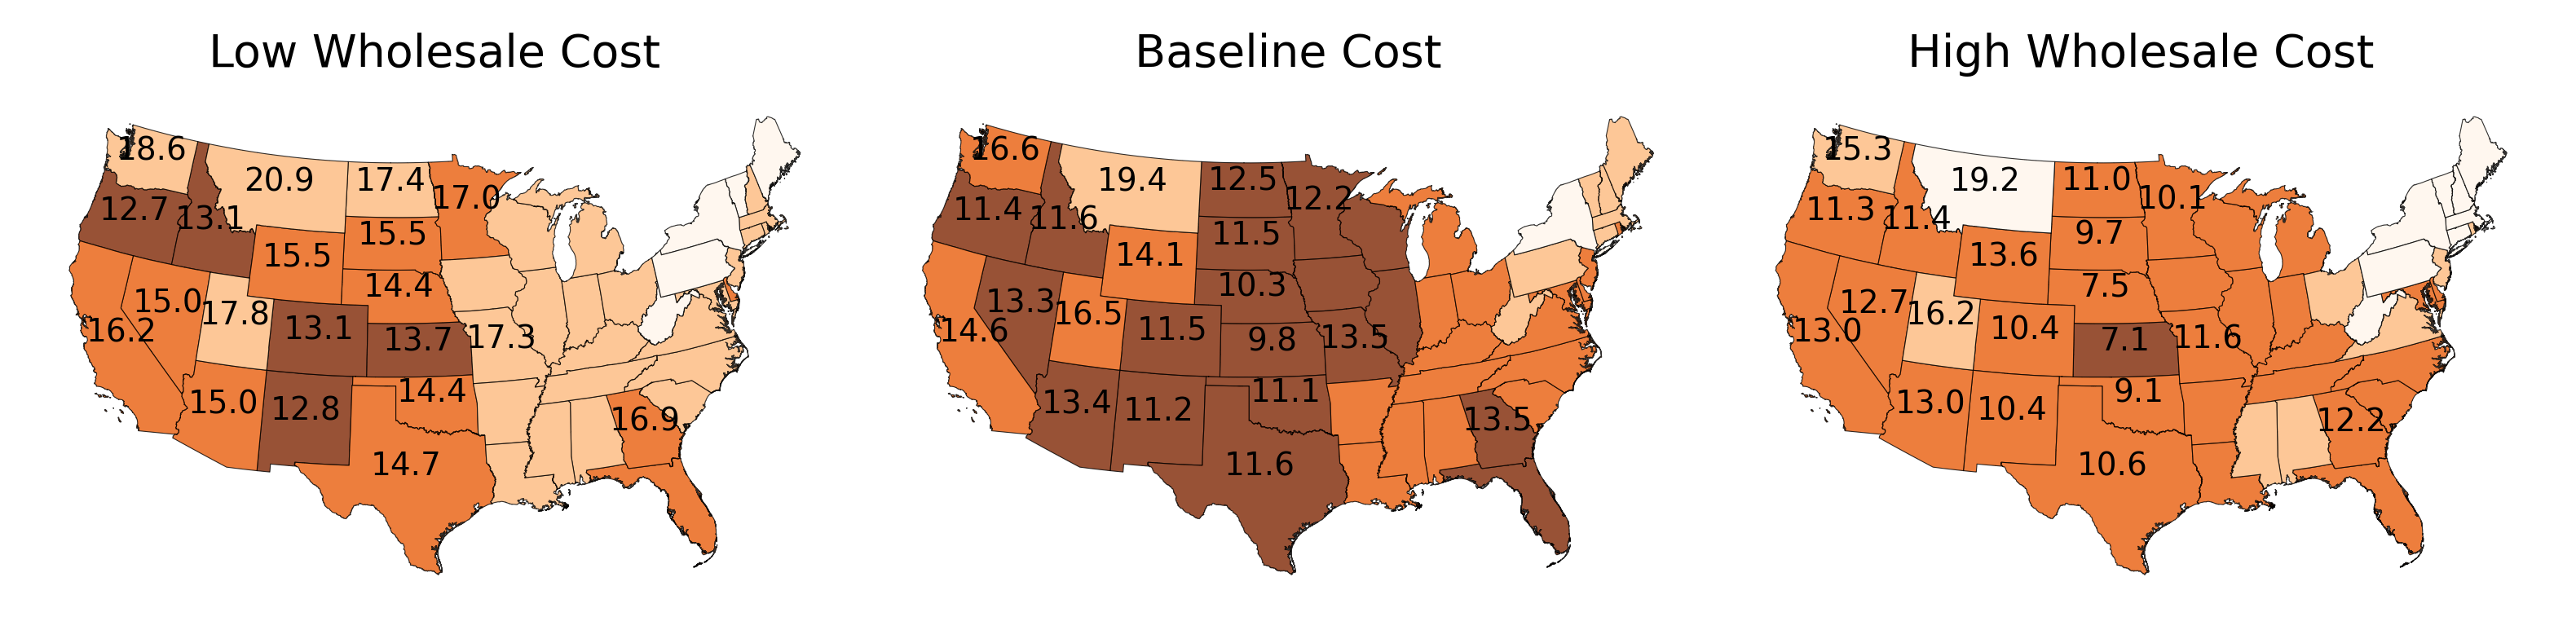

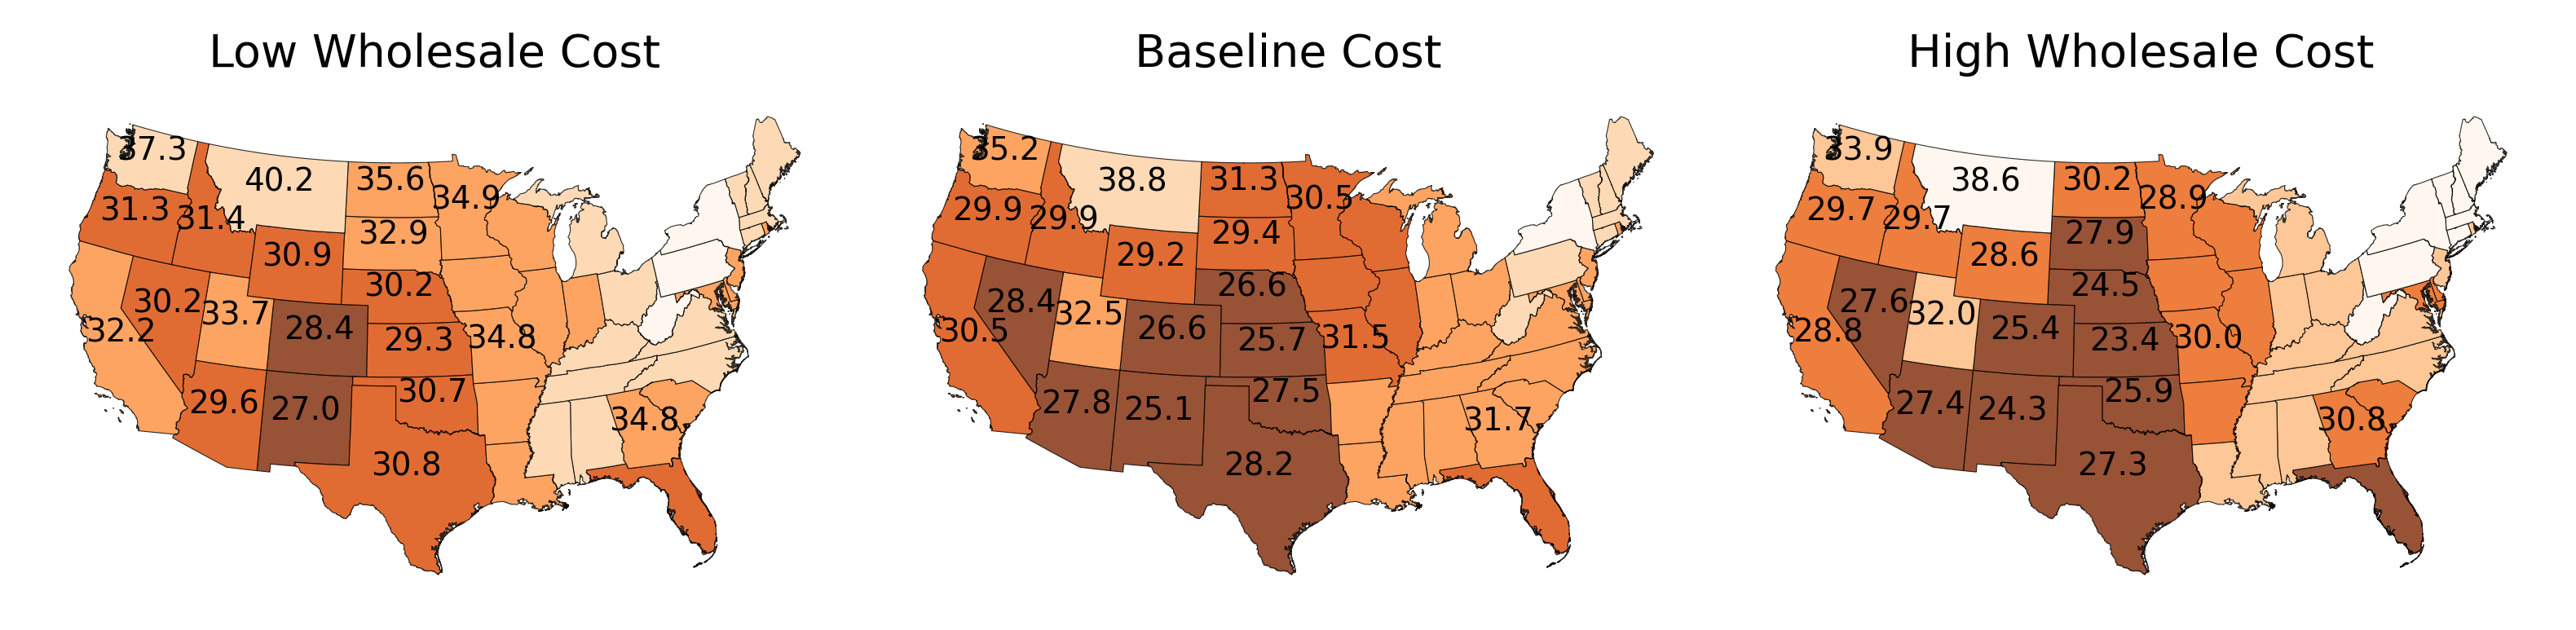

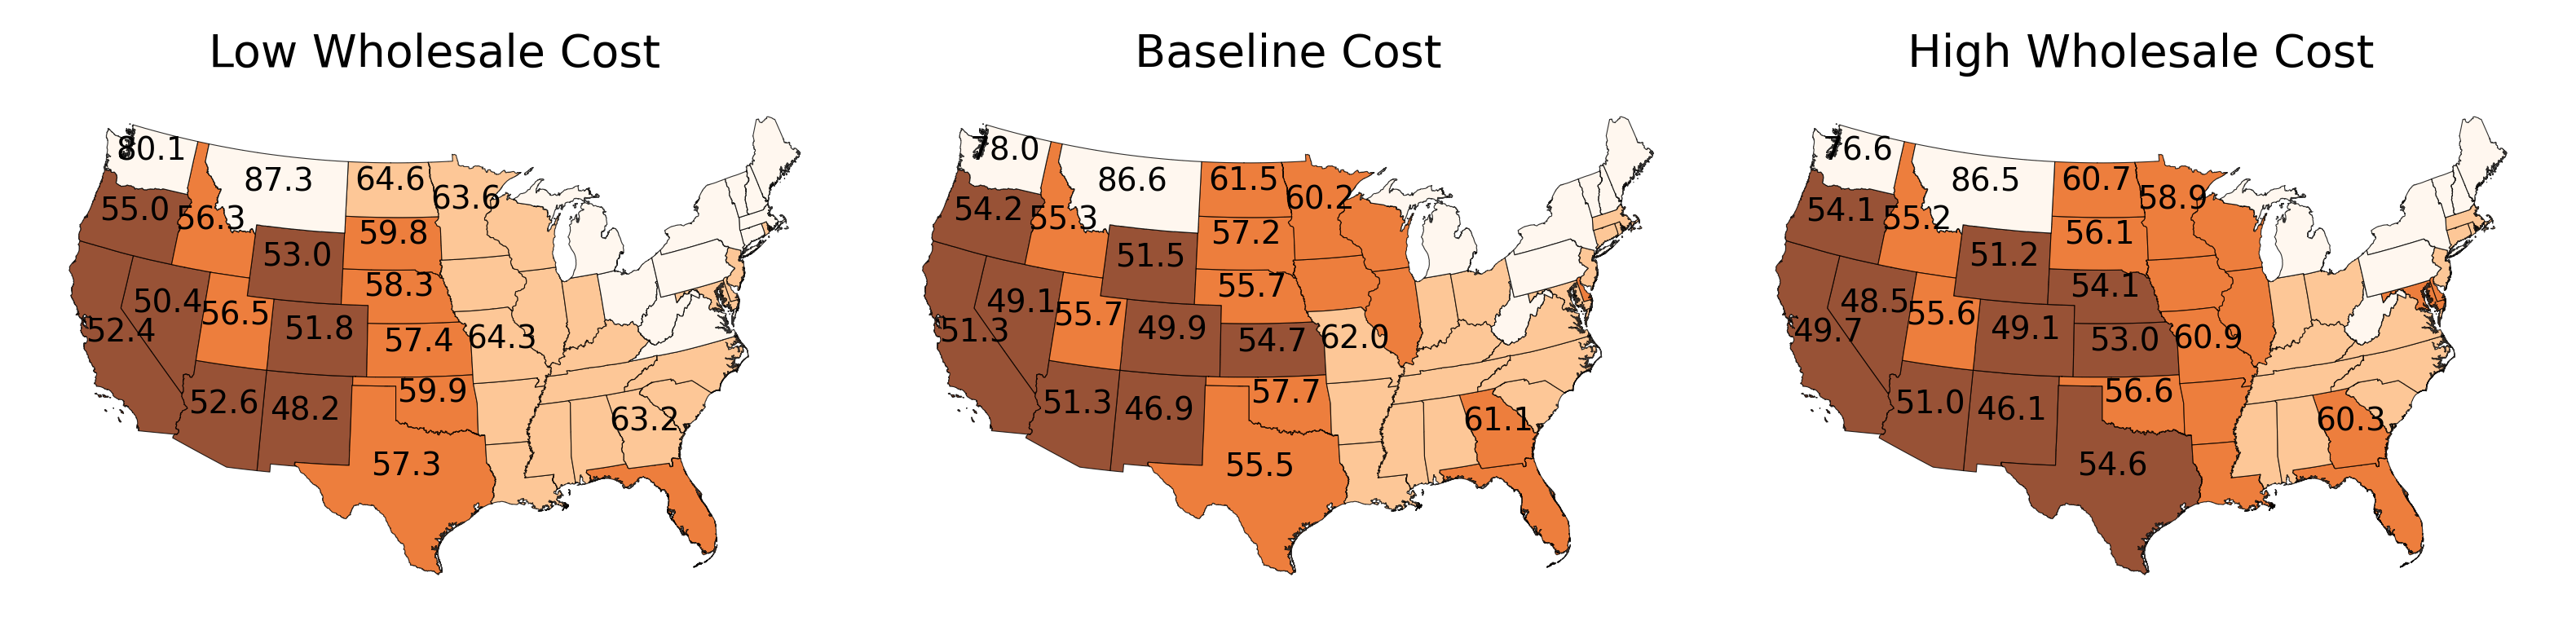

In [5]:
# --- Choropleths ---
Viz.triple_choropleth(column='marginal_cost_mwh',
               tech='pv', batt_size=0,
               ascending=True, reverse_cmap=True)

Viz.triple_choropleth(column='marginal_cost_mwh',
               tech='pv', batt_size=25,
               ascending=True, reverse_cmap=True)


Viz.triple_choropleth(column='marginal_cost_mwh',
               tech='pv', batt_size=100,
               ascending=True, reverse_cmap=True)

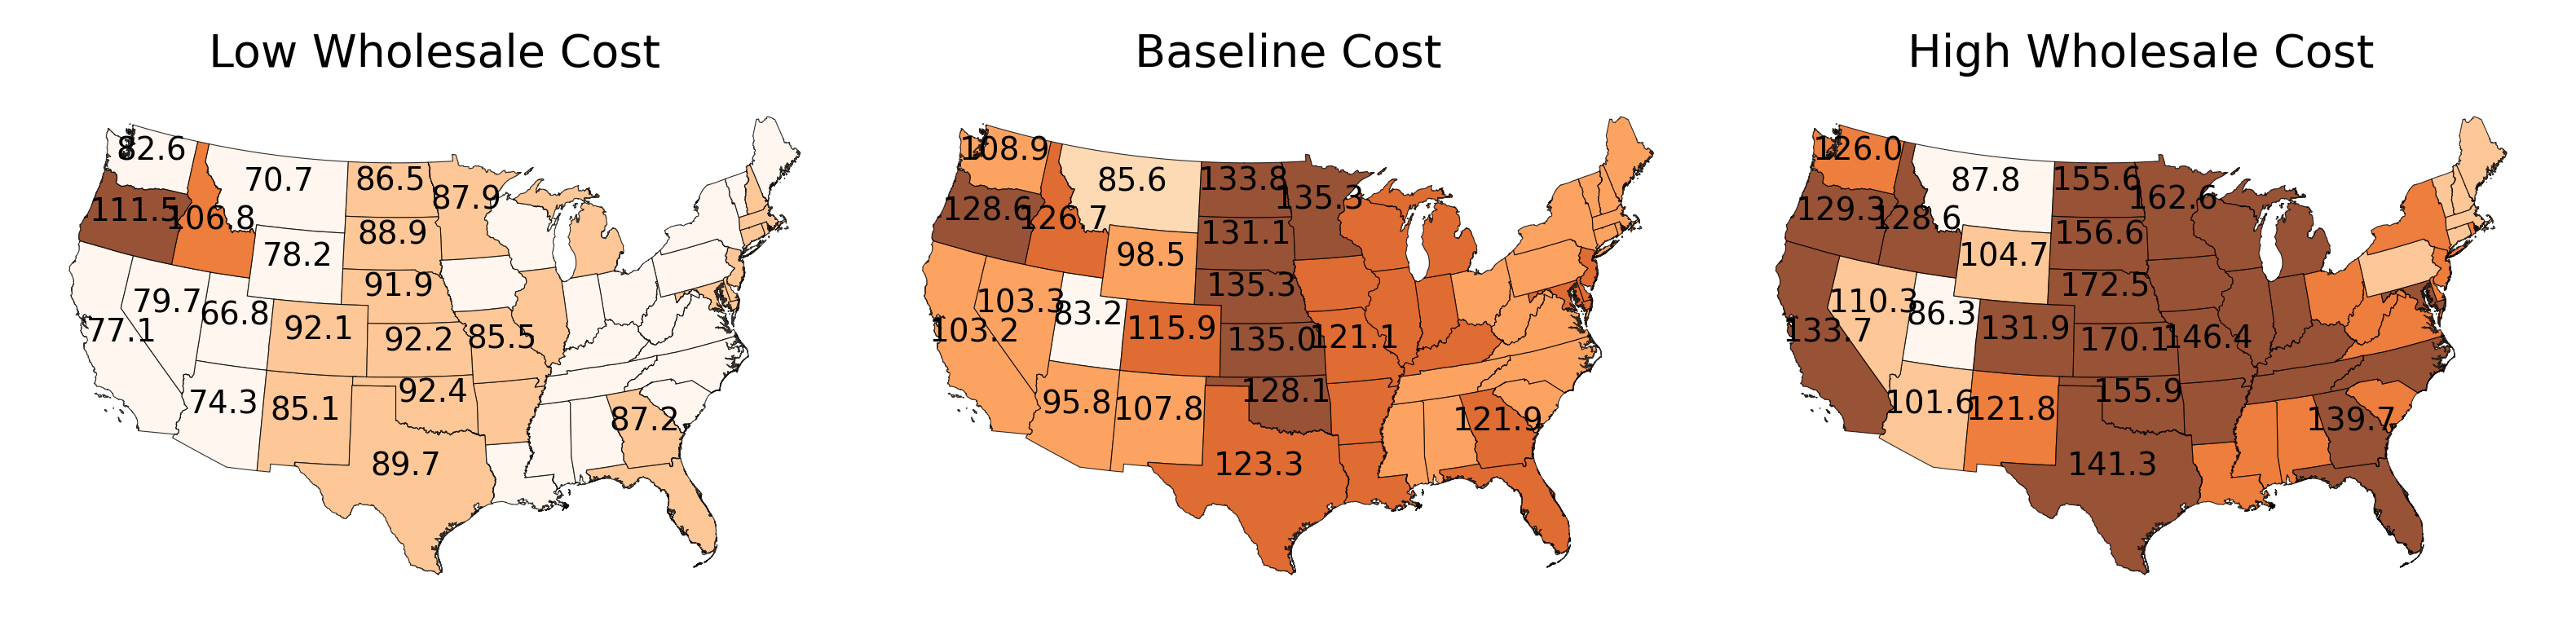

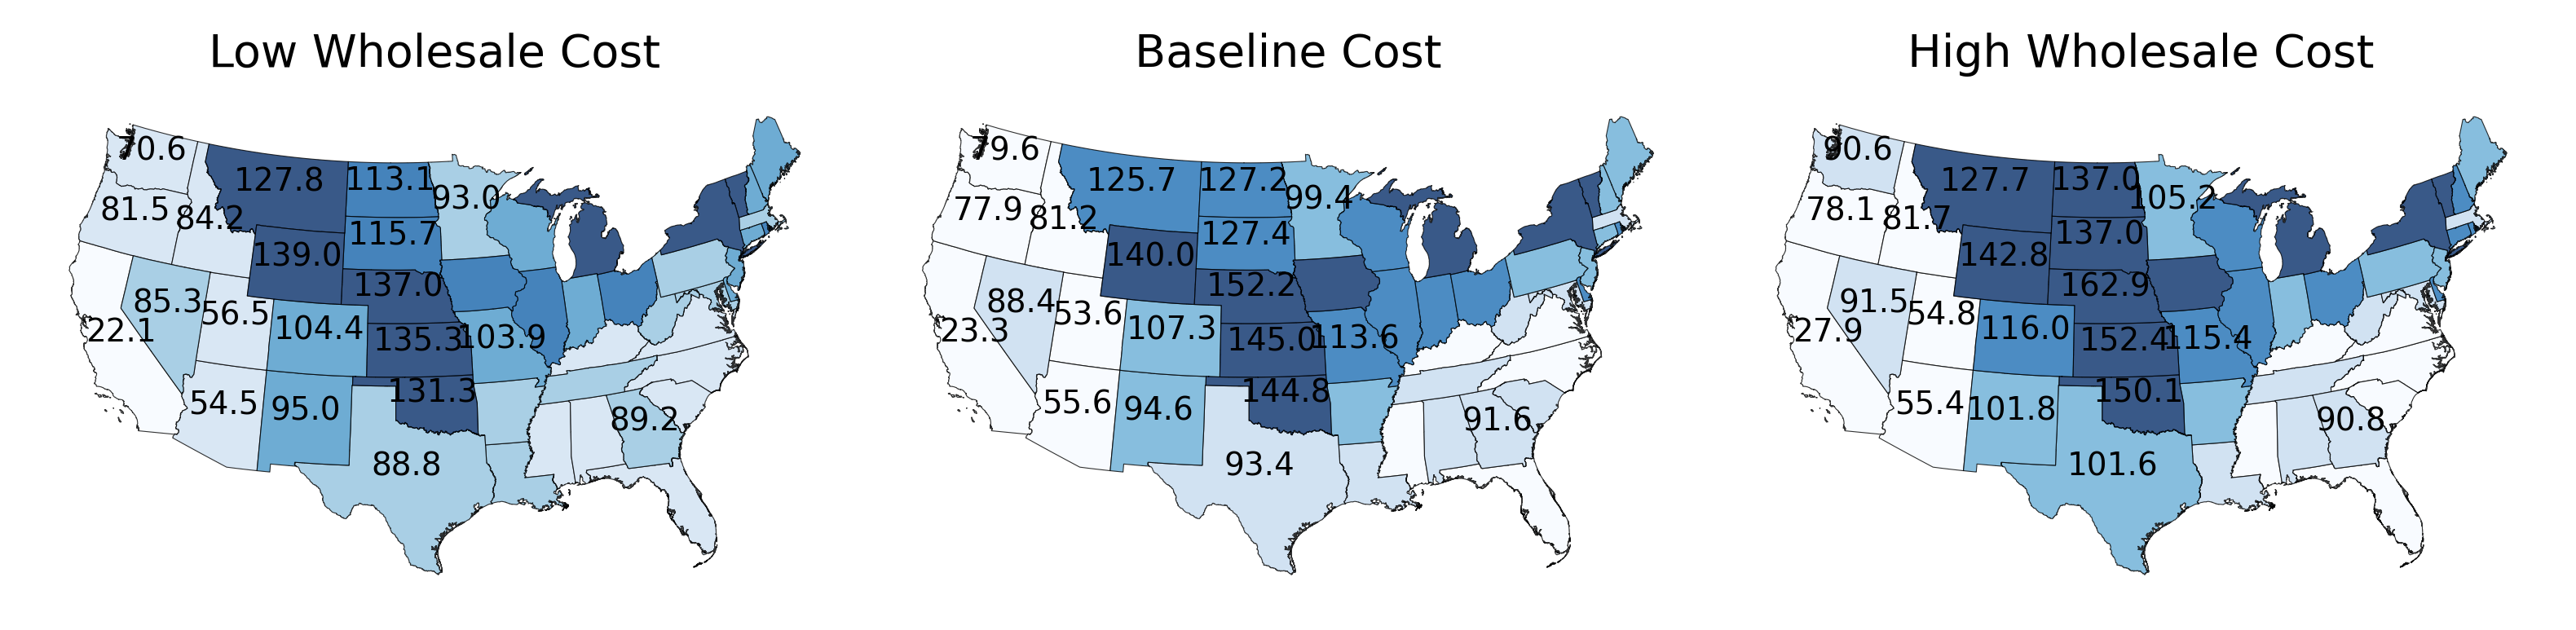

In [6]:
Viz.triple_choropleth(column='lifetime_co2_rate_marginal',
               tech='pv',
               ascending=True, reverse_cmap=False)

Viz.triple_choropleth(column='lifetime_co2_rate_marginal',
               tech='wind',
               ascending=True, reverse_cmap=False)


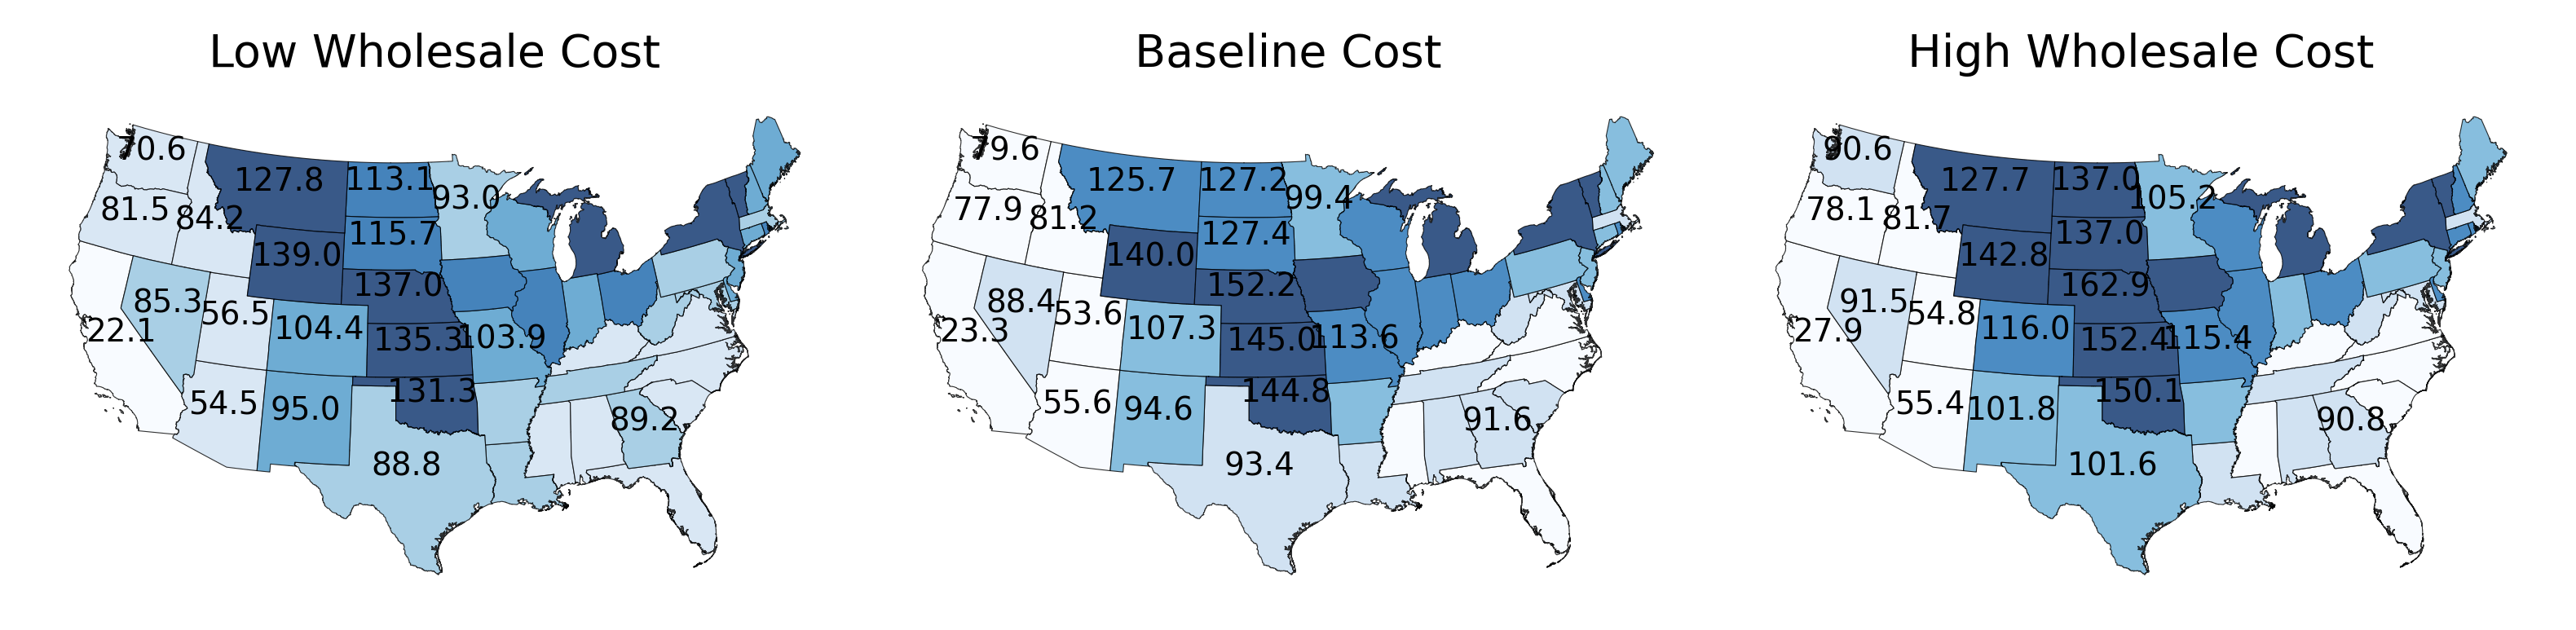

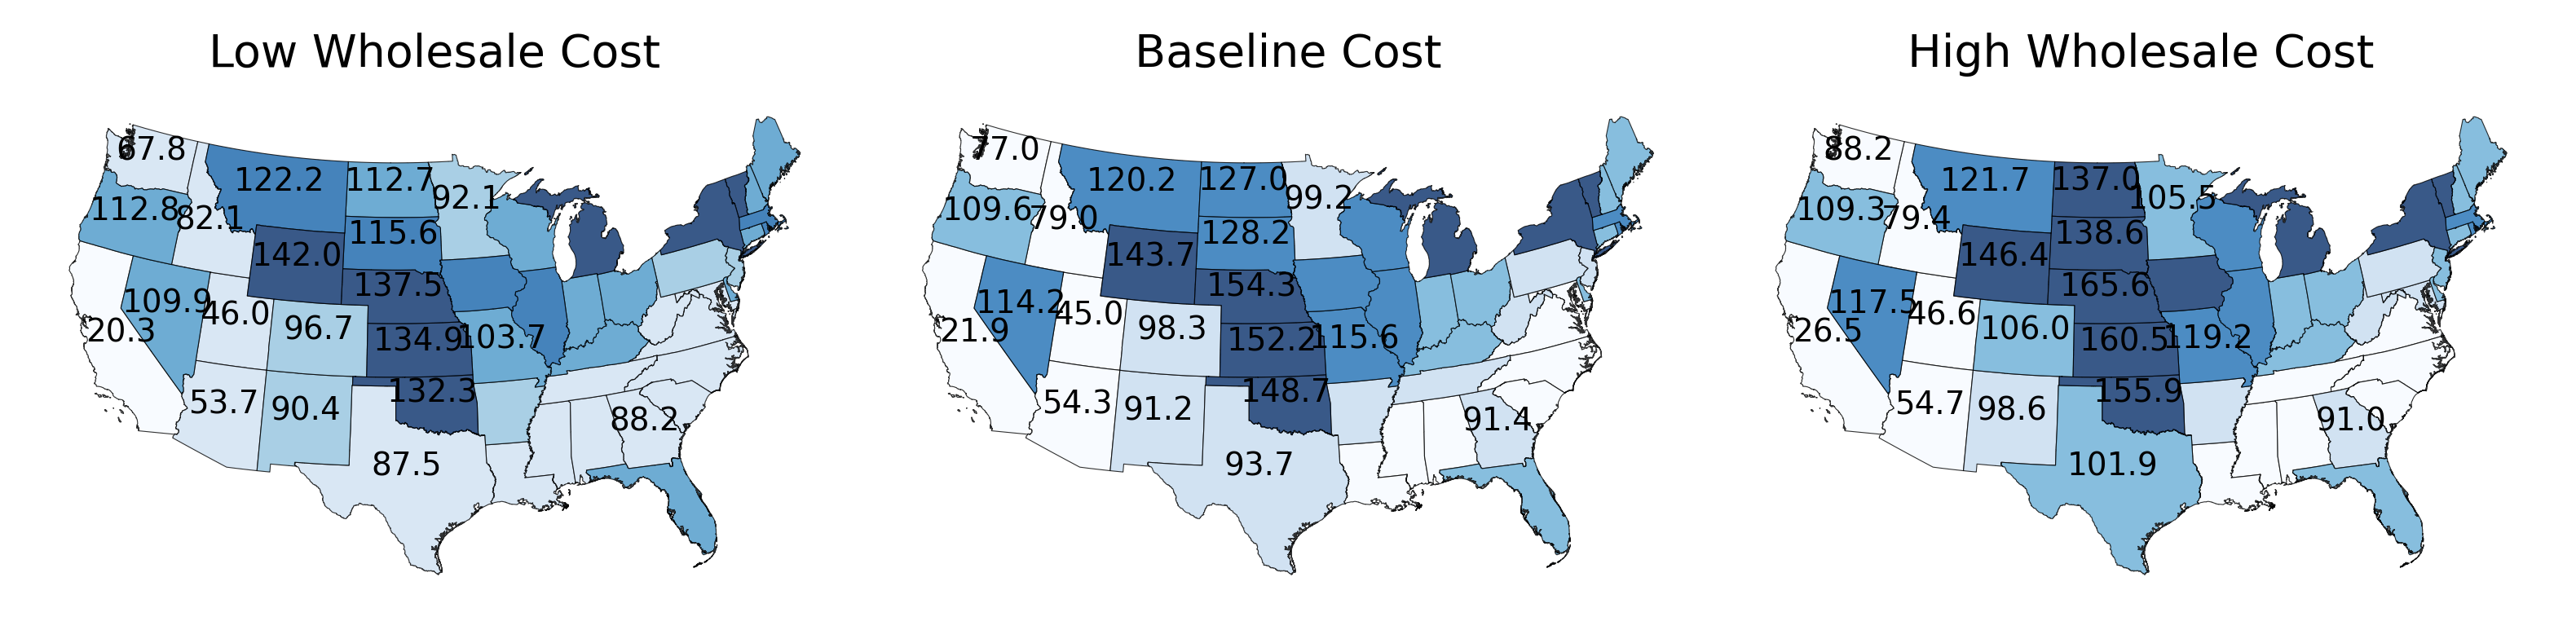

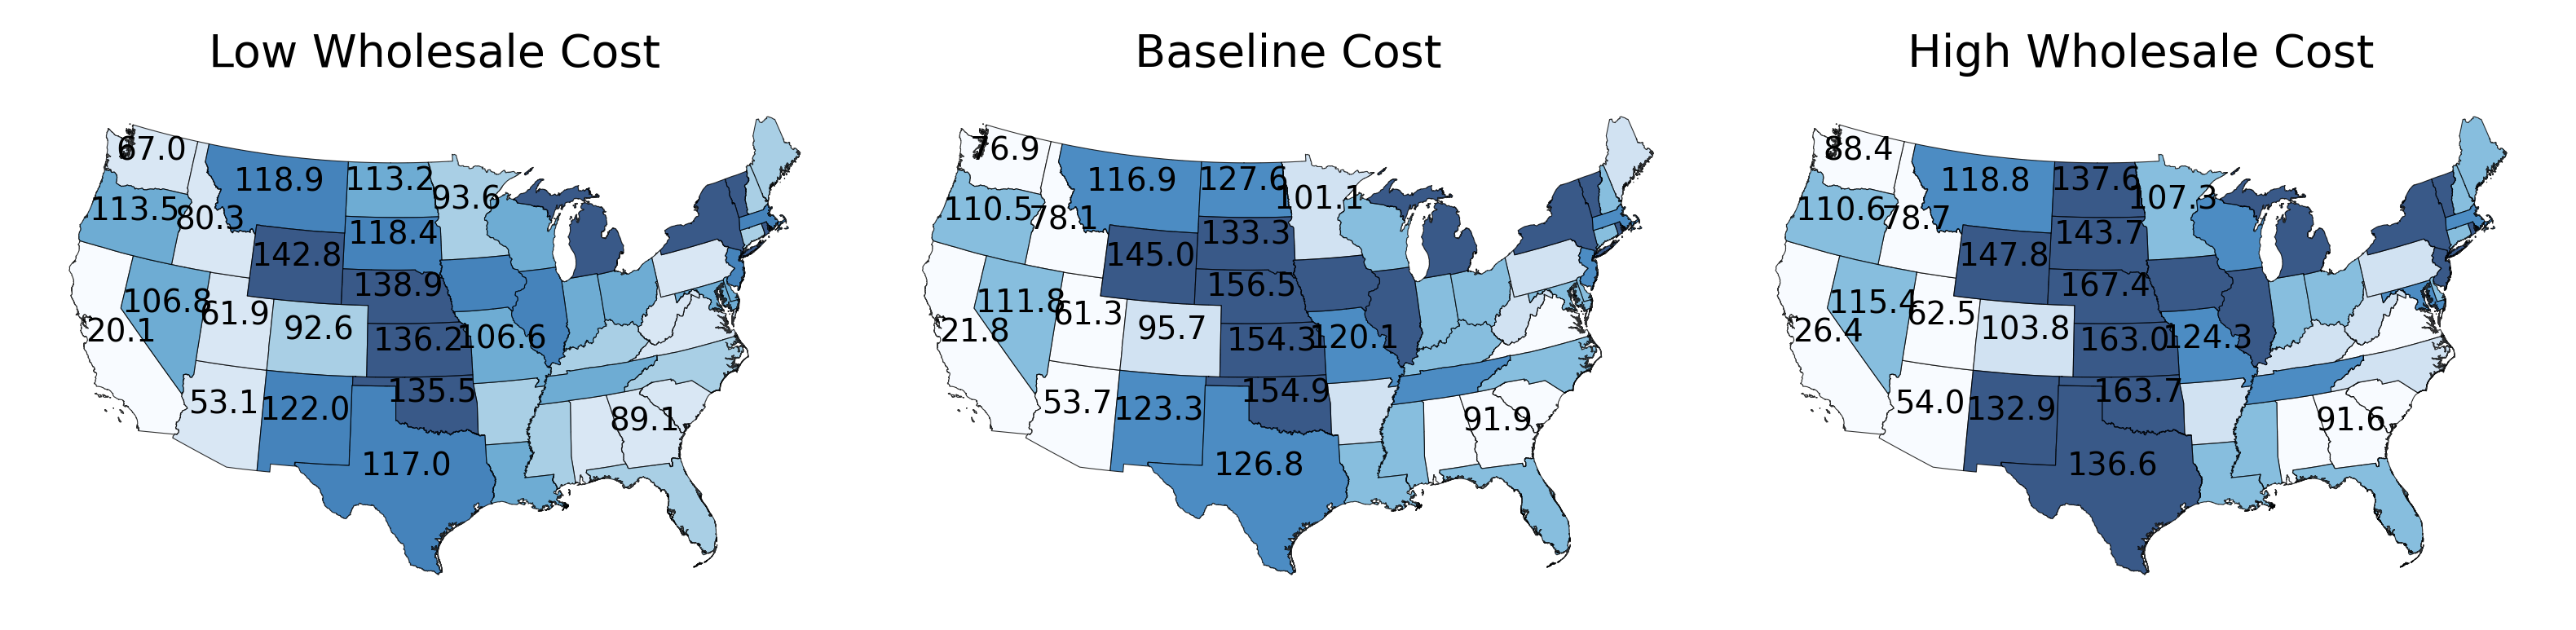

In [7]:
# --- Choropleths ---
Viz.triple_choropleth(column='lifetime_co2_rate_marginal',
               tech='wind', batt_size=0,
               ascending=True, reverse_cmap=False)

Viz.triple_choropleth(column='lifetime_co2_rate_marginal',
               tech='wind', batt_size=25,
               ascending=True, reverse_cmap=False)


Viz.triple_choropleth(column='lifetime_co2_rate_marginal',
               tech='wind', batt_size=100,
               ascending=True, reverse_cmap=False)

In [8]:
set(list(results.columns))

{'6par_Adj',
 '6par_Il',
 '6par_Io',
 '6par_Rs',
 '6par_Rsh',
 '6par_a',
 'ac_loss',
 'adjusted_installed_cost',
 'analysis_period_irr',
 'annual_ac_battery_loss_percent',
 'annual_ac_gross',
 'annual_ac_inv_clip_loss_percent',
 'annual_ac_inv_eff_loss_percent',
 'annual_ac_inv_pnt_loss_percent',
 'annual_ac_inv_pso_loss_percent',
 'annual_ac_inv_tdc_loss_percent',
 'annual_ac_lifetime_loss_percent',
 'annual_ac_loss_ond',
 'annual_ac_perf_adj_loss_percent',
 'annual_ac_wiring_loss',
 'annual_ac_wiring_loss_percent',
 'annual_dc_battery_loss_percent',
 'annual_dc_diodes_loss',
 'annual_dc_diodes_loss_percent',
 'annual_dc_gross',
 'annual_dc_invmppt_loss',
 'annual_dc_lifetime_loss_percent',
 'annual_dc_loss_ond',
 'annual_dc_mismatch_loss',
 'annual_dc_mismatch_loss_percent',
 'annual_dc_module_loss_percent',
 'annual_dc_mppt_clip_loss_percent',
 'annual_dc_nameplate_loss',
 'annual_dc_nameplate_loss_percent',
 'annual_dc_net',
 'annual_dc_nominal',
 'annual_dc_optimizer_loss',
 'annu

In [9]:
co = results.loc[results['region'] == 'CO']

In [10]:
co[['tech','scenario','batt_size','lifetime_co2_rate_marginal']]

tech                scenario  batt_size  \
marginal_cost_mwh    pv  StdScen19_High_RE_Cost        0.0   
marginal_cost_mwh    pv  StdScen19_High_RE_Cost       25.0   
marginal_cost_mwh    pv  StdScen19_High_RE_Cost      100.0   
marginal_cost_mwh  wind  StdScen19_High_RE_Cost        0.0   
marginal_cost_mwh  wind  StdScen19_High_RE_Cost       25.0   
marginal_cost_mwh  wind  StdScen19_High_RE_Cost      100.0   
marginal_cost_mwh    pv   StdScen19_Low_RE_Cost        0.0   
marginal_cost_mwh    pv   StdScen19_Low_RE_Cost       25.0   
marginal_cost_mwh    pv   StdScen19_Low_RE_Cost      100.0   
marginal_cost_mwh  wind   StdScen19_Low_RE_Cost        0.0   
marginal_cost_mwh  wind   StdScen19_Low_RE_Cost       25.0   
marginal_cost_mwh  wind   StdScen19_Low_RE_Cost      100.0   
marginal_cost_mwh    pv      StdScen19_Mid_Case        0.0   
marginal_cost_mwh    pv      StdScen19_Mid_Case       25.0   
marginal_cost_mwh    pv      StdScen19_Mid_Case      100.0   
marginal_cost_mwh  wind      StdScen19_Mid_Case        0.0   
marginal_cost_mwh  wind      StdScen19_Mid_Case       25.0   
marginal_cost_mwh  wind      StdScen19_Mid_Case      100.0   

                   lifetime_co2_rate_marginal  
marginal_cost_mwh                1.319193e+08  
marginal_cost_mwh                1.328925e+08  
marginal_cost_mwh                1.435682e+08  
marginal_cost_mwh                1.159529e+08  
marginal_cost_mwh                1.060452e+08  
marginal_cost_mwh                1.038001e+08  
marginal_cost_mwh                9.212652e+07  
marginal_cost_mwh                9.095019e+07  
marginal_cost_mwh                1.042172e+08  
marginal_cost_mwh                1.044318e+08  
marginal_cost_mwh                9.670073e+07  
marginal_cost_mwh                9.257147e+07  
marginal_cost_mwh                1.159369e+08  
marginal_cost_mwh                1.164817e+08  
marginal_cost_mwh                1.301490e+08  
marginal_cost_mwh                1.072577e+08  
marginal_cost_mwh                9.829766e+07  
marginal_cost_mwh                9.572688e+07